## Analiza danych 
źródło: titanic.csv

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Wstępne uwagi po analizie:

Dane są niepełne oraz wymagają uzupełnienia (age, embarked). W przypadku 'Cabin' - kolumna nie będzie brana pod uwagę, dlatego zostanie usunięta

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.drop(columns=['Cabin'],inplace=True)

df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Analiza EDA

In [7]:
round(df['Survived'].value_counts(normalize=True) * 100)



Survived
0    62.0
1    38.0
Name: proportion, dtype: float64

In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Z 891 pasażerów, 342 osoby przeżyły (około 38%).
Dane pokazują, że większość osób nie przeżyła katastrofy.

In [9]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [10]:
round(df['Sex'].value_counts(normalize=True) * 100)

Sex
male      65.0
female    35.0
Name: proportion, dtype: float64

Na 891 pasażerów, większość stanowili mężczyżni - około 65%. 

In [12]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Na statku było dokładnie 577 mężczyzn oraz 314 kobiet.


In [30]:
round((df.groupby('Sex')['Survived'].sum()/ 891 * 100))

Sex
female    26.0
male      12.0
Name: Survived, dtype: float64

In [53]:
round(df.groupby('Sex')['Survived'].agg(['sum','count','mean']))

,sum,count,mean
Sex,,,
female,233,314,1.0
male,109,577,0.0


<Axes: xlabel='Sex'>

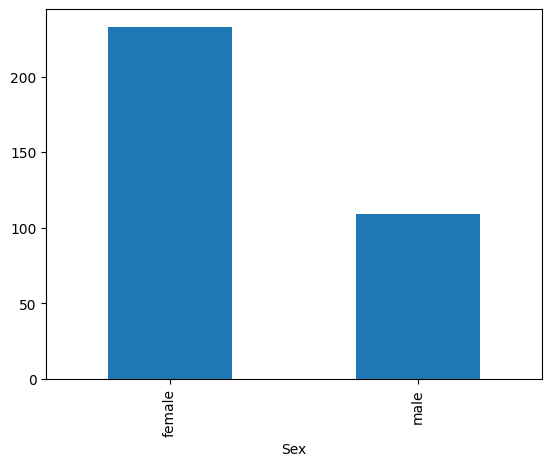

In [63]:
sex_survival = df.groupby('Sex')['Survived'].sum().reset_index()
sex_survival.plot(kind='bar', x='Sex', y='Survived', legend=False)

Przeżywalność na statku wynosiła dla kobiet - 26%(233) oraz dla mężczyzn 12%(109).


In [58]:
round(df.groupby(['Sex','Pclass'])['Survived'].agg(['sum','mean', 'count']))

sum  mean  count
Sex    Pclass                  
female 1        91   1.0     94
       2        70   1.0     76
       3        72   0.0    144
male   1        45   0.0    122
       2        17   0.0    108
       3        47   0.0    347

In [59]:
round((df.groupby(['Sex', 'Pclass'])['Survived'].sum()/ 891 * 100))

Sex     Pclass
female  1         10.0
        2          8.0
        3          8.0
male    1          5.0
        2          2.0
        3          5.0
Name: Survived, dtype: float64

<Axes: xlabel='Pclass'>

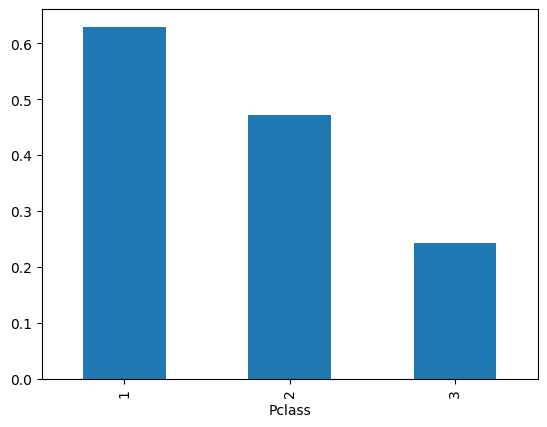

In [73]:
class_survival = df.groupby('Pclass')['Survived'].mean().reset_index()
class_survival.plot(kind='bar', x='Pclass', y='Survived', legend=False)

Przeżywalność na satku w zależności od klasy zakwaterowania oraz płci była najwyższa w 1 klasie dla kobiet(10%) oraz w 1 i 3 dla mężczyzn (5%)
Podsumowując największe szanse na przeżycie mieli pasażerowie z 1 klasy.

Ćwiczenie te miało na celu zapozanienie i szlifowanie podstaw pandas oraz rozpoczęcie nauki z danymi wielowymiarowymi. 